In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
uploaded = files.upload()

Saving heart_attack_prediction_dataset_main.csv to heart_attack_prediction_dataset_main.csv


In [ ]:
dataset = pd.read_csv(io.StringIO(uploaded['heart_attack_prediction_dataset_main.csv'].decode('utf-8')))
dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,Medication_Use,Stress_Level,Income,BMI,Triglycerides,Sleep_Hours_Per_Day,Heart_Attack_Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,0,0,9,261404,31.251233,286,6,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,1,0,1,285768,27.194973,235,7,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,1,1,9,235282,28.176571,587,4,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,1,0,9,125640,36.464704,378,4,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,1,0,6,160555,21.809144,231,5,0


In [ ]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               8763 non-null   object 
 1   Age                      8763 non-null   int64  
 2   Sex                      8763 non-null   object 
 3   Cholesterol              8763 non-null   int64  
 4   Blood Pressure           8763 non-null   object 
 5   Heart Rate               8763 non-null   int64  
 6   Diabetes                 8763 non-null   int64  
 7   Family_History           8763 non-null   int64  
 8   Smoking                  8763 non-null   int64  
 9   Obesity                  8763 non-null   int64  
 10  Alcohol_Consumption      8763 non-null   int64  
 11  Exercise_Hours_Per_Week  8763 non-null   float64
 12  Previous_Heart_Problems  8763 non-null   int64  
 13  Medication_Use           8763 non-null   int64  
 14  Stress_Level            

(8763, 20)

In [ ]:
dataset.isnull().sum()

Patient ID                 0
Age                        0
Sex                        0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Diabetes                   0
Family_History             0
Smoking                    0
Obesity                    0
Alcohol_Consumption        0
Exercise_Hours_Per_Week    0
Previous_Heart_Problems    0
Medication_Use             0
Stress_Level               0
Income                     0
BMI                        0
Triglycerides              0
Sleep_Hours_Per_Day        0
Heart_Attack_Risk          0
dtype: int64

In [ ]:
dataset_subset = dataset.drop(['Patient ID'],axis=1)
dataset_subset.shape

(8763, 19)

In [ ]:
dataset_subset['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dataset_subset2 = dataset_subset.drop(['Sex','Blood Pressure','Sleep_Hours_Per_Day'],axis=1)
dataset_subset2



,Age,Cholesterol,Heart Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,Medication_Use,Stress_Level,Income,BMI,Triglycerides,Heart_Attack_Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,261404,31.251233,286,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,285768,27.194973,235,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,235282,28.176571,587,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,125640,36.464704,378,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,160555,21.809144,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,235420,19.655895,67,0
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,217881,23.993866,617,0
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,36998,35.406146,527,1
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,209943,27.294020,114,0


In [ ]:
#Final Preprocessed Dataset
dataset_subset2

,Age,Cholesterol,Heart Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,Medication_Use,Stress_Level,Income,BMI,Triglycerides,Heart_Attack_Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,261404,31.251233,286,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,285768,27.194973,235,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,235282,28.176571,587,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,125640,36.464704,378,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,160555,21.809144,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,235420,19.655895,67,0
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,217881,23.993866,617,0
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,36998,35.406146,527,1
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,209943,27.294020,114,0


Individual numerical features analysis with attack




`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



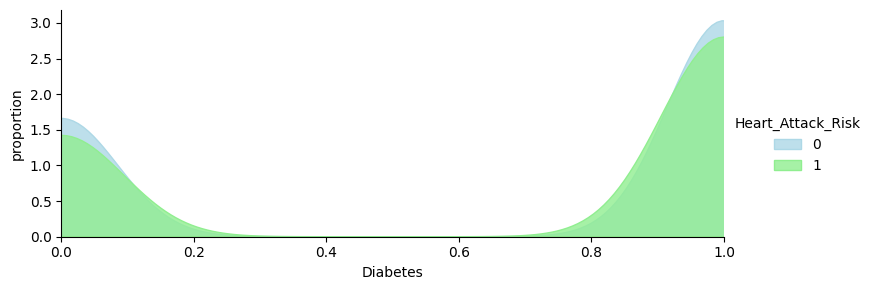



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



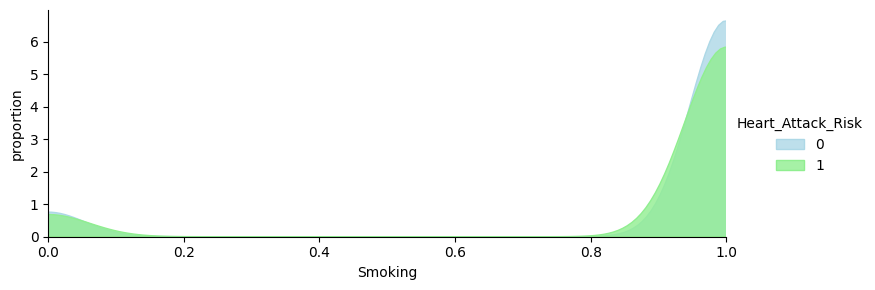



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



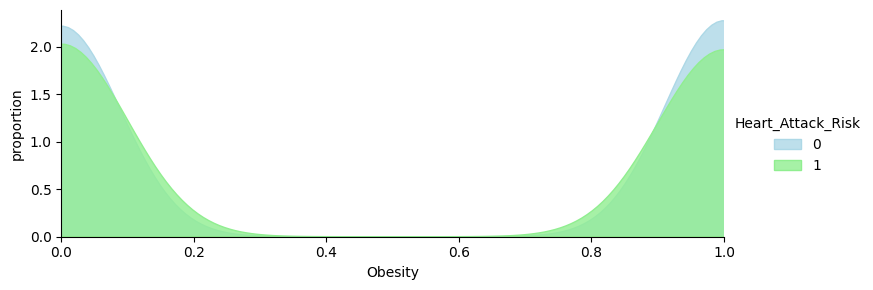



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



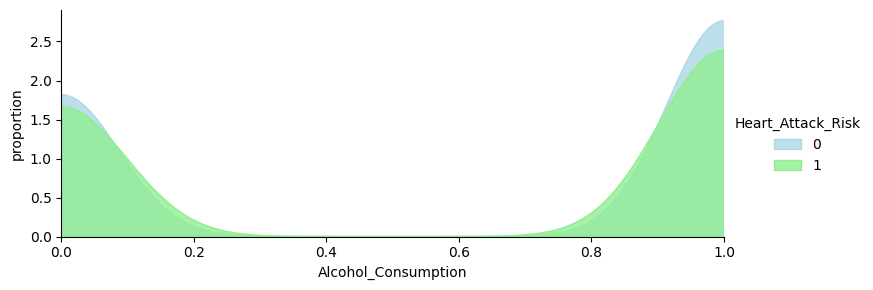

In [ ]:
#Numerical features analysis
import seaborn as sns
def plot_dis_number (ds_list):
    g = sns.FacetGrid(dataset_subset2, hue = "Heart_Attack_Risk", aspect = 2.5, palette={1:"lightgreen", 0:"lightblue"})
    g = g.map(sns.kdeplot,ds_list, shade = True, alpha = 0.8 )
    g.set(xlim = (0, dataset_subset2[ds_list].max()))
    g.add_legend()
    g.set_axis_labels(ds_list, "proportion")
    plt.show()
print("Individual numerical features analysis with attack")
plot_dis_number("Diabetes")
plot_dis_number("Smoking")
plot_dis_number("Obesity")
plot_dis_number("Alcohol_Consumption")

Correlation matrix: 
                              Age  Cholesterol  Heart Rate  Diabetes  \
Age                      1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol             -0.009107     1.000000    0.000315 -0.013428   
Heart Rate              -0.003844     0.000315    1.000000  0.006764   
Diabetes                -0.014105    -0.013428    0.006764  1.000000   
Family_History           0.008353    -0.021608   -0.013470 -0.013844   
Smoking                  0.394891     0.016342   -0.012331  0.000527   
Obesity                 -0.008140    -0.014843    0.012725  0.012866   
Alcohol_Consumption     -0.006666    -0.007261    0.003459  0.005551   
Exercise_Hours_Per_Week  0.001206     0.021517    0.008276 -0.007014   
Previous_Heart_Problems  0.000868    -0.006070   -0.004956  0.000867   
Medication_Use           0.000980    -0.000905    0.009244 -0.002656   
Stress_Level             0.018307    -0.024487   -0.004547  0.006719   
Income                  -0.001733     0.000

<Axes: >

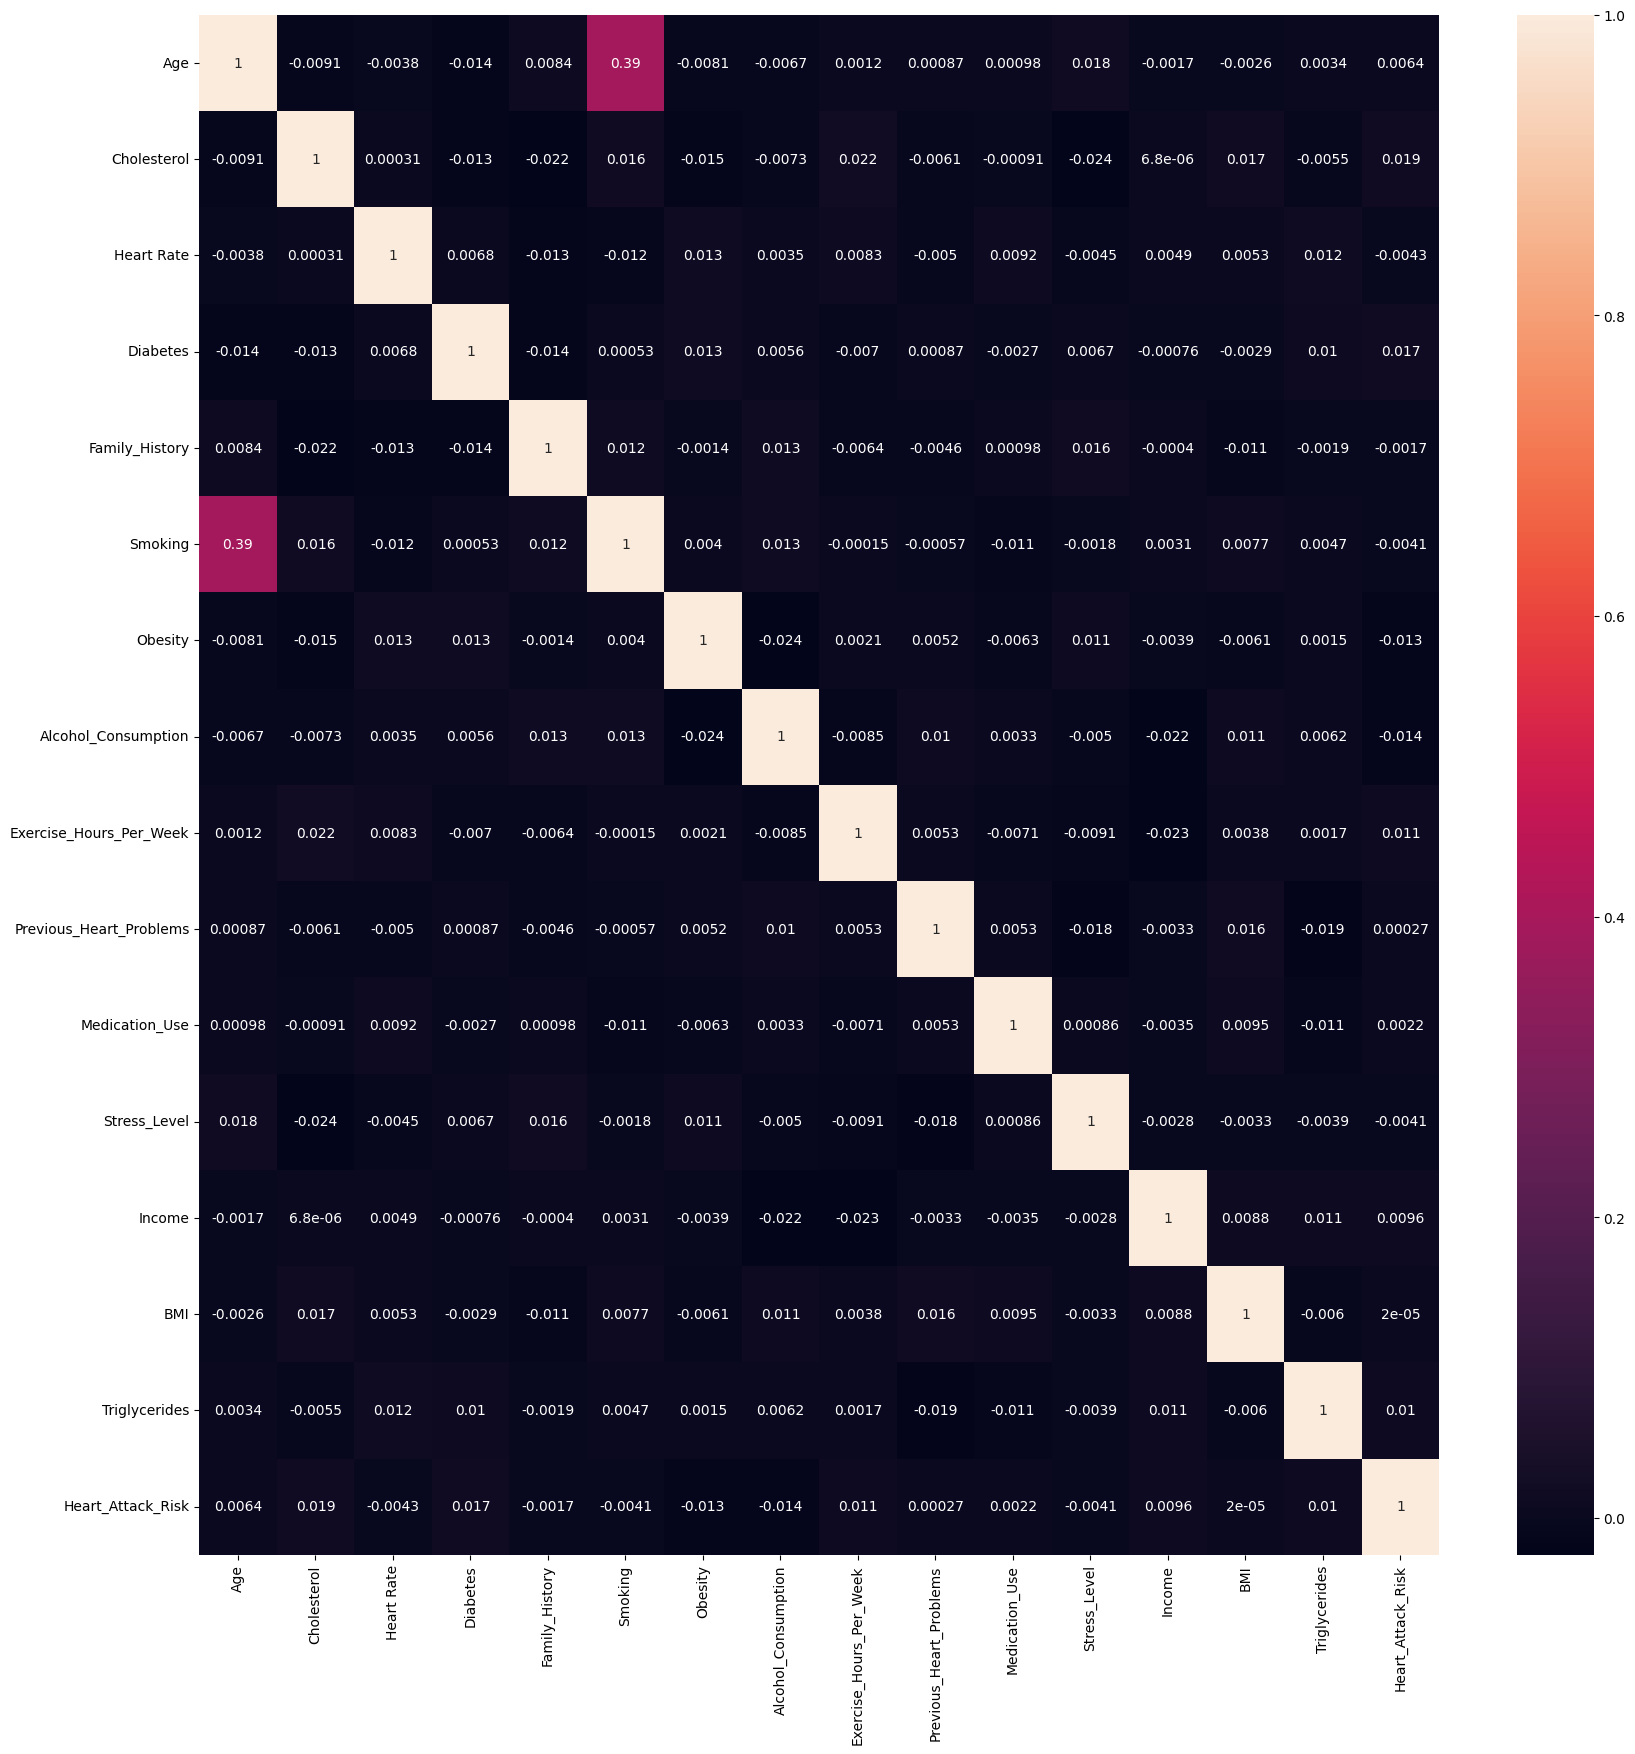

In [ ]:
#Exploratory Data Analysis (EDA)

#correlation matrix heatmap for the data set
f, ax = plt.subplots(figsize=(20, 20))
corr_var = dataset_subset2.corr()
print("Correlation matrix: ")
print(corr_var)

print("Correlation matrix visualization: ")
sns.heatmap(corr_var, annot = True)

Machine Learning Algorithms Implementation with Gaussian Naive Bayes, KNN, Multinomial Naive Bayes, Random Forest Classifier, Logistic Regression Classifier

In [ ]:
feature_taken = 'Heart_Attack_Risk'
y = dataset_subset2.Heart_Attack_Risk
X= dataset_subset2.drop(feature_taken,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
print(X_train.shape,X_test.shape)

(5257, 15) (3506, 15)


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)
print("training accuracy:", gnb.score(X_train,y_train)) #training accuracy
print("test accuracy:",gnb.score(X_test,y_test)) # test accuracy

training accuracy: 0.640479360852197
test accuracy: 0.6437535653166001


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print("training accuracy:", gnb.score(X_train,y_train)) #training accuracy
print("test accuracy:",gnb.score(X_test,y_test)) # test accuracy

training accuracy: 0.640479360852197
test accuracy: 0.6437535653166001


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("training accuracy:", knn.score(X_train,y_train)) #training accuracy
print("test accuracy:",knn.score(X_test,y_test)) # test accuracy

training accuracy: 0.7175194978124405
test accuracy: 0.5752994865944095


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print("training accuracy:", rfc.score(X_train,y_train)) #training accuracy
print("test accuracy:",rfc.score(X_test,y_test)) # test accuracy

training accuracy: 1.0
test accuracy: 0.6286366229321164


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
print("training accuracy:", lr.score(X_train,y_train)) #training accuracy
print("test accuracy:",lr.score(X_test,y_test)) # test accuracy

training accuracy: 0.640479360852197
test accuracy: 0.6437535653166001


SHAP AND LIME EXPLANATION


In [ ]:
!pip install shap

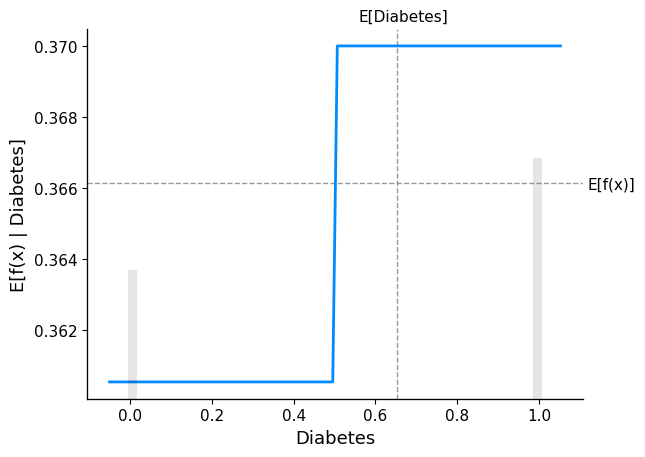

In [ ]:
import shap

select_model = rfc
select_feature = 'Diabetes'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50 #can change, depends on number of samples
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

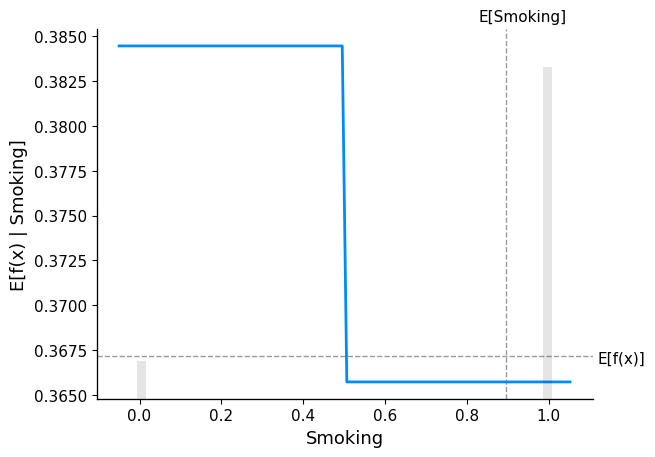

In [ ]:
import shap

select_model = rfc
select_feature = 'Smoking'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50 #can change, depends on number of samples
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

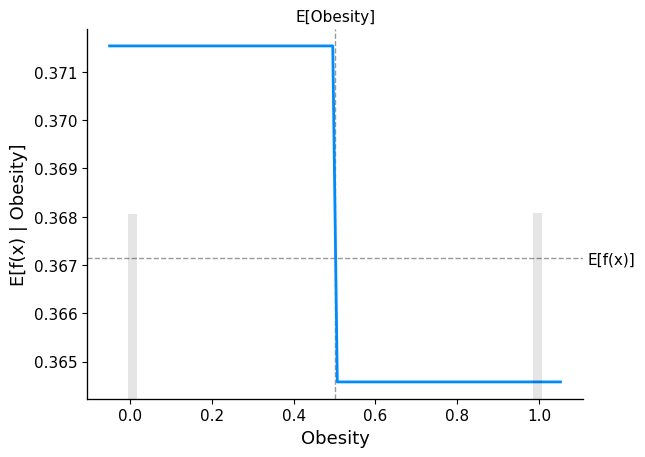

In [ ]:
#Smoking 	Obesity 	Alcohol_Consumption
import shap

select_model = rfc
select_feature = 'Obesity'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50 #can change, depends on number of samples
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

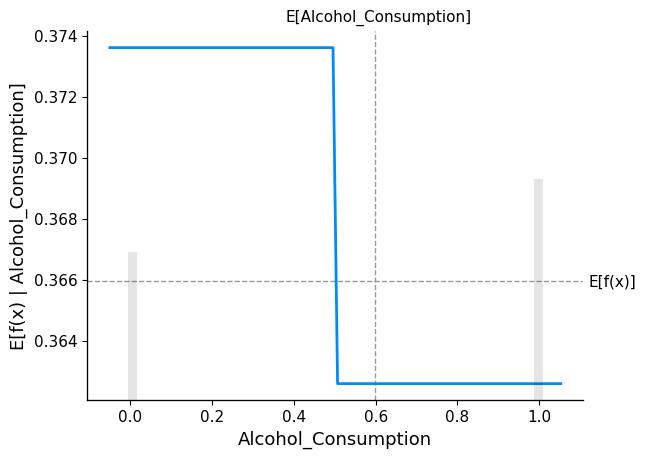

In [ ]:
#Smoking 	Obesity 	Alcohol_Consumption
import shap

select_model = rfc
select_feature = 'Alcohol_Consumption'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50 #can change, depends on number of samples
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=84878907009a5635c6099776b5a9666b321a48a9ae1718024a7b274865597b95
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
#available features - pclass,	survived,	age,	sibsp,	parch,	fare,	sex_enc,	embarked_enc
#available models - gnb, mnb, knn, lr, rfc

feature_select = 'Stress_Level'
model_predict = rfc

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
feature_names=list(X_train.columns),
class_names=[feature_select],
verbose=True, mode='classification')
expl = explainer.explain_instance(X_test.iloc[0], model_predict.predict_proba,
num_features=16) #can change num_features
expl.as_list()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3866732006191938
Prediction_local [0.31318567]
Right: 0.2


[('4.90 < Exercise_Hours_Per_Week <= 9.98', -0.016912245783287774),
 ('88521.00 < Income <= 157300.00', -0.016184886648533507),
 ('0.00 < Alcohol_Consumption <= 1.00', -0.01604952837809378),
 ('222.00 < Triglycerides <= 415.00', -0.013374294621123654),
 ('23.50 < BMI <= 28.78', -0.009076773653209521),
 ('57.00 < Heart Rate <= 75.00', -0.008538932436121516),
 ('Obesity <= 0.00', 0.007070012358442602),
 ('0.00 < Diabetes <= 1.00', 0.007000389317575494),
 ('Stress_Level <= 3.00', -0.006351883923780276),
 ('191.00 < Cholesterol <= 259.00', -0.006115172421523334),
 ('Previous_Heart_Problems <= 0.00', 0.005354361419875781),
 ('Family_History <= 0.00', 0.0037033366460650983),
 ('54.00 < Age <= 72.00', -0.0034627108298627904),
 ('Medication_Use <= 0.00', -0.000549198999870519),
 ('Smoking <= 1.00', 0.0)]

In [ ]:
import lime
import lime.lime_tabular
#available features - pclass,	survived,	age,	sibsp,	parch,	fare,	sex_enc,	embarked_enc
#available models - gnb, mnb, knn, lr, rfc

feature_select = 'Heart_Attack_Risk'
model_predict = rfc

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
feature_names=list(X_train.columns),
class_names=[feature_select],
verbose=True, mode='classification')
expl = explainer.explain_instance(X_test.iloc[0], model_predict.predict_proba,
num_features=16) #can change num_features
expl.as_list()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.38073546111447787
Prediction_local [0.3219533]
Right: 0.2


[('222.00 < Triglycerides <= 415.00', -0.01757324464714029),
 ('4.90 < Exercise_Hours_Per_Week <= 9.98', -0.015308986232806457),
 ('0.00 < Alcohol_Consumption <= 1.00', -0.014021038210491391),
 ('0.00 < Diabetes <= 1.00', 0.01356407633234415),
 ('88521.00 < Income <= 157300.00', -0.012923837848806227),
 ('57.00 < Heart Rate <= 75.00', -0.005260389562845917),
 ('191.00 < Cholesterol <= 259.00', -0.00501728744654419),
 ('Stress_Level <= 3.00', -0.004422368728174294),
 ('54.00 < Age <= 72.00', -0.004026077095066322),
 ('Obesity <= 0.00', 0.0037718184672645505),
 ('Family_History <= 0.00', 0.0032776186026292247),
 ('23.50 < BMI <= 28.78', -0.0028490867539642827),
 ('Medication_Use <= 0.00', 0.001195405054179615),
 ('Previous_Heart_Problems <= 0.00', 0.0008112414080675581),
 ('Smoking <= 1.00', 0.0)]

In [ ]:
pd.DataFrame(expl.as_list())

,0,1
0,222.00 < Triglycerides <= 415.00,-0.017573
1,4.90 < Exercise_Hours_Per_Week <= 9.98,-0.015309
2,0.00 < Alcohol_Consumption <= 1.00,-0.014021
3,0.00 < Diabetes <= 1.00,0.013564
4,88521.00 < Income <= 157300.00,-0.012924
5,57.00 < Heart Rate <= 75.00,-0.005260
6,191.00 < Cholesterol <= 259.00,-0.005017
7,Stress_Level <= 3.00,-0.004422
8,54.00 < Age <= 72.00,-0.004026
9,Obesity <= 0.00,0.003772


In [ ]:
expl.show_in_notebook(show_table=True)